In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#read dataset
Psy = pd.read_csv('Youtube01-Psy.csv')
Katy = pd.read_csv('Youtube02-KatyPerry.csv')
Eminem = pd.read_csv('Youtube04-Eminem.csv')
Shakira = pd.read_csv('Youtube05-Shakira.csv')
LMFAO = pd.read_csv('Youtube03-LMFAO.csv')

## PREPROCESSING

In [0]:
#date insignificant parameter

df = pd.concat([Shakira, Eminem, Katy, Psy, LMFAO])
df.drop('DATE', axis=1, inplace=True)

df.shape

(1956, 4)

In [0]:
df.head()

,COMMENT_ID,AUTHOR,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,shakira is best for worldcup﻿,0


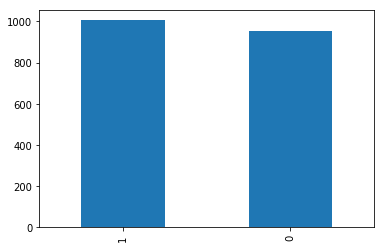

In [0]:

#class plot to compare number of data values of each class
df['CLASS'].value_counts().plot(kind='bar')

In [0]:
#balanced data check

classes = df['CLASS']
print(classes.value_counts())

1    1005
0     951
Name: CLASS, dtype: int64


In [0]:
text_messages = df["CONTENT"]

In [0]:
#REGEX TO ENCODE useless data as in emails, numbers etc into useful text features

# Replace email addresses with 'email'
processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' 
processed = processed.str.replace(r'£|\$', 'moneysymb')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [0]:
print(text_messages[:10])

0                                           Nice song﻿
1                                        I love song ﻿
2                                        I love song ﻿
3    860,000,000 lets make it first female to reach...
4                        shakira is best for worldcup﻿
5                    The best world cup song ever!!!!﻿
6                                              I love﻿
7    SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakir...
8                                            Awesome ﻿
9                                    I like shakira..﻿
Name: CONTENT, dtype: object


In [0]:
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [0]:
processed = processed.str.lower()
print(processed)

0                                              nice song
1                                            i love song
2                                            i love song
3      numbr numbr numbr lets make it first female to...
4                           shakira is best for worldcup
                             ...                        
433                      like this comment for no reason
434                                       love this song
435    this song is awesome these guys are the best l...
436          how many thumbs up for louis saving the day
437                                           nice numbr
Name: CONTENT, Length: 1956, dtype: object


In [0]:
#nlp


import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
#stop words removal





from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [0]:
#stemming

ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [0]:
#tokenising data helps detect patterns in data

from nltk.tokenize import word_tokenize

all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [0]:
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 3472
Most common words: [('numbr', 1133), ('check', 581), ('video', 386), ('song', 340), ('com', 284), ('subscrib', 277), ('like', 272), ('youtub', 272), ('br', 258), ('pleas', 249), ('http', 236), ('love', 220), ('channel', 200), ('music', 157), ('make', 139)]


In [0]:
NO_OF_FEATURES=2000
word_features = list(all_words.keys())[:NO_OF_FEATURES]

In [0]:
#feature extraction based on top 1500 frequently occuring words

def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

features = find_features(str(processed[0]))
for key, value in features.items():
    if value == True:
        print (key)

nice
song
love
numbr
watch
much
check
youtub
com
href
http
www
v
amp
channel
girl
xxx
also
free
gener
tube
talk
huh
lead
auto
pilot


In [0]:
messages = list(zip(processed, classes))


#seeding to have similar shuffling for each run and hence prevent overfitting
seed = 1
np.random.seed = seed
np.random.shuffle(messages)

featuresets = [(find_features(text), label) for (text, label) in messages]

In [0]:

#split data into train and test for accuracy check later 

from sklearn import model_selection

training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

In [0]:
print(len(training))
print(len(testing))

1467
489


In [0]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## MODEL COMPILATION AND CLASSIFYING

In [0]:

#accuracy of various classifiers checked to find the best model


from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)
names1 = []
results = []

#model evaluation
for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
 
        
    print("{} Accuracy: {}".format(name, accuracy))
    names1.append(name)
    results.append(accuracy)

K Nearest Neighbors Accuracy: 85.68507157464212
Decision Tree Accuracy: 96.93251533742331
Random Forest Accuracy: 97.54601226993866
Logistic Regression Accuracy: 96.93251533742331
SGD Classifier Accuracy: 96.11451942740287
Naive Bayes Accuracy: 90.1840490797546
SVM Linear Accuracy: 95.91002044989774


## **EVALUATION**


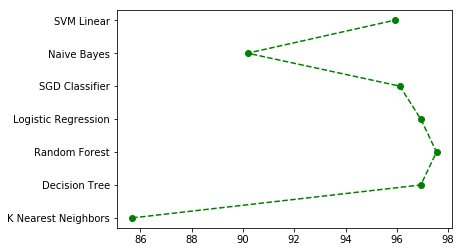

<Figure size 432x288 with 0 Axes>

In [0]:
values=list(range(0,7))
plt.plot(results,names,'go--')

plt.show()
plt.savefig("2000-features.jpg")

In [0]:
txt_features, labels = zip(*testing)

In [0]:
#max_accurate model
#final results to be obtained with highest accuracy model
index=results.index(max(results))
best_model=classifiers[index]
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [0]:


nltk_model=SklearnClassifier(best_model)
nltk_model.train(training)
prediction = nltk_model.classify_many(txt_features)
print(nltk_model)

<SklearnClassifier(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))>


In [0]:
# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       247
           1       0.99      0.94      0.97       242

    accuracy                           0.97       489
   macro avg       0.97      0.97      0.97       489
weighted avg       0.97      0.97      0.97       489



predicted     
                  ham spam
actual ham        245    2
       spam        14  228

### IMPROVEMENTS

#### 1.DEEP LEARNING FEATURE FUNCTION
####(Count Vectorisation implemented)

In [0]:
#VALIDATION
#DEEP LEARNING MODEL

NO_OF_FEATURES=2250
word_features = list(all_words.keys())[:NO_OF_FEATURES]


def find_features_dl(message):
    words = word_tokenize(message)
    features = []
    for word in word_features:
        features.append(1 if (word in words) else 0)

    return features

features = find_features_dl(str(processed[0]))


In [0]:
messages = list(zip(processed, classes))
print(len(messages))

seed = 1
np.random.seed = seed
np.random.shuffle(messages)

featuresets = [(find_features_dl(text), label) for (text, label) in messages]

1956


In [0]:

from sklearn import model_selection

training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)
print(len(training))

1467


In [0]:
len_train=len(training)
validation=training[1100:]
training=training[:1100]



In [0]:
print(len(training))
print(len(validation))

1100
367


In [0]:
X_train=[]
Y_train=[]
for i in training:
    X_train.append(i[0])
    Y_train.append(i[1])



In [0]:
X_test=[]
Y_test=[]
for i in testing:
    X_test.append(i[0])
    Y_test.append(i[1])

GETTING VALIDATION DATA FOR TUNING

In [0]:
X_validation=[]
Y_validation=[]
for i in validation:
    X_validation.append(i[0])
    Y_validation.append(i[1])

In [0]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=NO_OF_FEATURES,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                36016     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 36,161
Trainable params: 36,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
#adam optimiser used to handle minima in non convex funtions

model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [0]:
print(len(validation))

367


In [0]:
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_validation,Y_validation),batch_size=64)

Train on 1100 samples, validate on 367 samples
Epoch 1/10
1100/1100 [==============================] - 1s 841us/sample - loss: 0.6691 - accuracy: 0.5836 - precision_1: 0.5531 - recall_1: 0.9858 - val_loss: 0.6419 - val_accuracy: 0.6403 - val_precision_1: 0.5962 - val_recall_1: 0.9793
Epoch 2/10
1100/1100 [==============================] - 0s 71us/sample - loss: 0.6148 - accuracy: 0.7700 - precision_1: 0.6935 - recall_1: 0.9894 - val_loss: 0.5822 - val_accuracy: 0.8229 - val_precision_1: 0.7623 - val_recall_1: 0.9637
Epoch 3/10
1100/1100 [==============================] - 0s 63us/sample - loss: 0.5459 - accuracy: 0.9073 - precision_1: 0.8556 - recall_1: 0.9858 - val_loss: 0.5160 - val_accuracy: 0.8965 - val_precision_1: 0.8605 - val_recall_1: 0.9585
Epoch 4/10
1100/1100 [==============================] - 0s 63us/sample - loss: 0.4708 - accuracy: 0.9573 - precision_1: 0.9390 - recall_1: 0.9805 - val_loss: 0.4490 - val_accuracy: 0.9319 - val_precision_1: 0.9242 - val_recall_1: 0.9482
Epoc

In [0]:
loss,accuracy,precision,recall= model.evaluate(X_test, Y_test, verbose=False)

In [0]:
print("loss: ",loss,"accuracy: ",accuracy,"precision: ",precision,"recall: ",recall)

loss:  0.2120346234071474 accuracy:  0.94887525 precision:  0.9586777 recall:  0.9392713


In [0]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])
